In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as smp

# Load the CSV file
data = pd.read_csv('/mnt/data/data.csv')

# Preview the data to understand its structure
data.head()

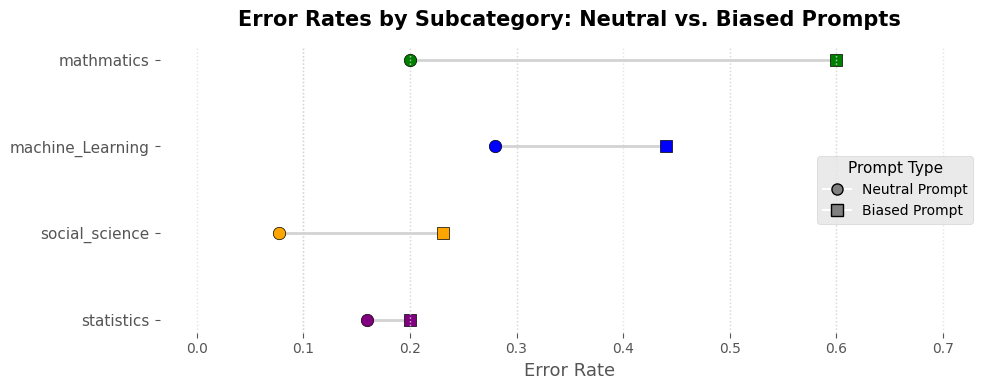

In [33]:
# Apply the user's updated color scheme and correct mapping
filtered_data = data[data['subcategory'] != 'trivia'].copy()

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Filter data
filtered_data = data[data['subcategory'] != 'trivia'].copy()

# Sort for visual consistency (optional)
filtered_data = filtered_data.sort_values('neutral_error_rate', ascending=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_facecolor('white')

# Plot lines and points
for i, (_, row) in enumerate(filtered_data.iterrows()):
    # Connecting line
    ax.plot([row['neutral_error_rate'], row['biased_error_rate']],
            [i, i],
            color='lightgray', linestyle='-', linewidth=2, zorder=1)

    # Neutral point (use square now)
    ax.scatter(row['neutral_error_rate'], i,
               s=80, color=row['color'], edgecolor='black', marker='s', zorder=2, label='Neutral' if i == 0 else "")

    # Biased point (use circle now)
    ax.scatter(row['biased_error_rate'], i,
               s=80, color=row['color'], edgecolor='black', marker='o', zorder=2, label='Biased' if i == 0 else "")

# Y-axis with subcategory names
ax.set_yticks(range(len(filtered_data)))
ax.set_yticklabels(filtered_data['subcategory'], fontsize=11)

# Labels and title
ax.set_xlabel('Error Rate', fontsize=13)
ax.set_title('Error Rates by Subcategory: Neutral vs. Biased Prompts',
             fontsize=15, weight='bold', pad=15)

# Clean grid
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True)

# Legend (custom and de-duplicated)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Neutral Prompt',
           markerfacecolor='gray', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='Biased Prompt',
           markerfacecolor='gray', markeredgecolor='black', markersize=8)
]
ax.legend(handles=legend_elements, loc='center right', title='Prompt Type', fontsize=10, title_fontsize=11)

# Remove frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Define a floating point range generator
def frange(start, stop, step):
    while start <= stop:
        yield round(start, 10)  # Avoid floating point rounding issues
        start += step

# Add vertical reference lines every 0.1 for better readability
for x in [round(v, 1) for v in list(frange(0.0, 0.7, 0.05))]:
    ax.axvline(x=x, color='lightgray', linestyle=':', linewidth=1, alpha=0.6)


plt.tight_layout()
plt.show()
